In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Two types of windows
-Rectangle window
$$\begin{equation*}\omega(n) = \begin{cases} 1 \ &\text{n $\in\left[ 0, N-1 \right]$}\\ 0 \ &\text{n $\notin\left[ 0, N-1 \right]$}\end{cases}\end{equation*}$$
-Hann window
$$\omega(n)=0.5\left(1 - cos(\frac{2\pi n}{N -1})\right)$$

In [9]:
def hannwindow(n, N):
    return 1 / 2 * (1 - np.cos(2 * np.pi * n / (N - 1)))


def rectWindow(n, N):
    return 1 if 0 <= n < N else 0

In [10]:
(a0, a1) = (1, 0.002)

w0 = 5.1
w1 = 5 * w0

n = 1000
T = 4 * np.pi
time = np.linspace(0, T, n)

In [11]:
def discreteFourierTransform(f, T, window):
    N = f.size
    Fx = np.zeros_like(f, dtype=complex)
    freq = np.zeros_like(f)
    for k in range(N):
        for n in range(N):
            Fx[k] += f[n] * window(n, N) * np.exp(1j * (2 * np.pi / N) * k * n)
            freq[k] = 2 * np.pi * k / T
    return Fx, freq

## $f(t)=a_{0}sin(\omega_{0}t)+a_{1}sin(\omega_{1}t)$

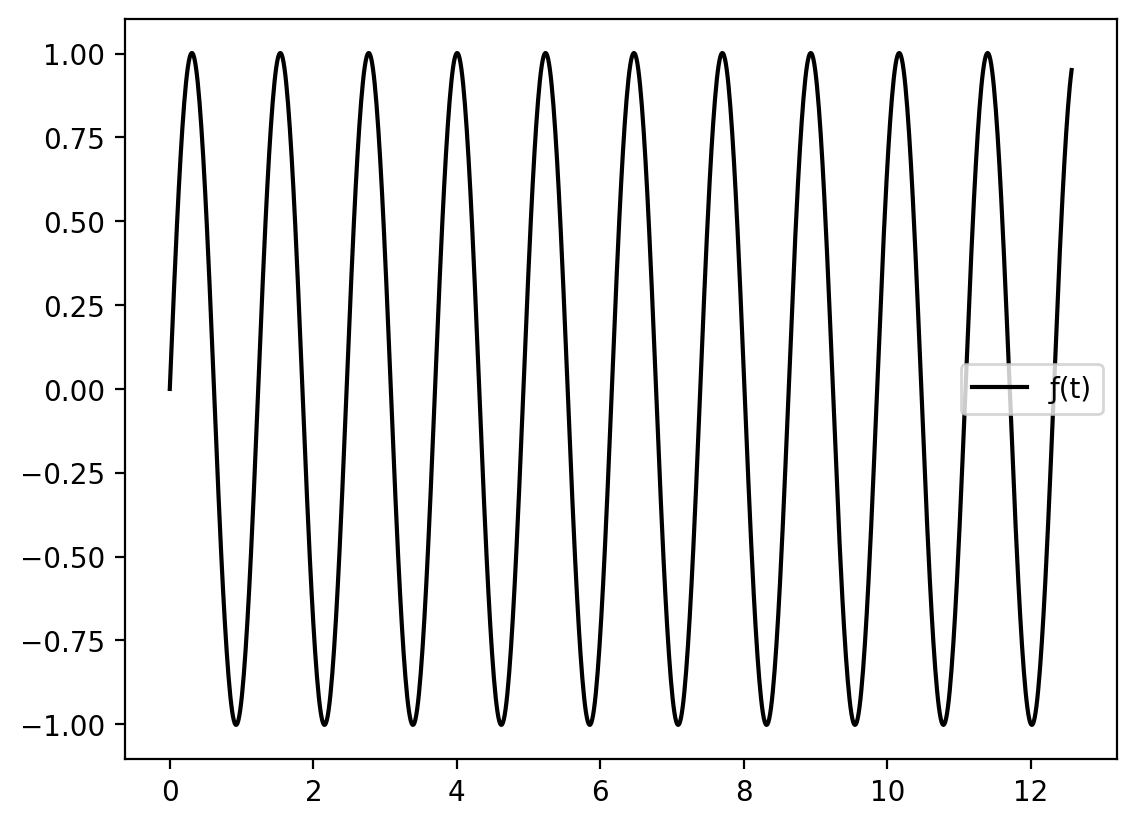

In [12]:
f = a0 * np.sin(w0 * time) + a1 * np.sin(w1 * time)
plt.plot(time, f, c='k', label='ƒ(t)')
plt.legend()
plt.show()

In [13]:
spectrumRectangle, freqRect = discreteFourierTransform(f, T, rectWindow)
spectrumHann, freqHann = discreteFourierTransform(f, T, hannwindow)

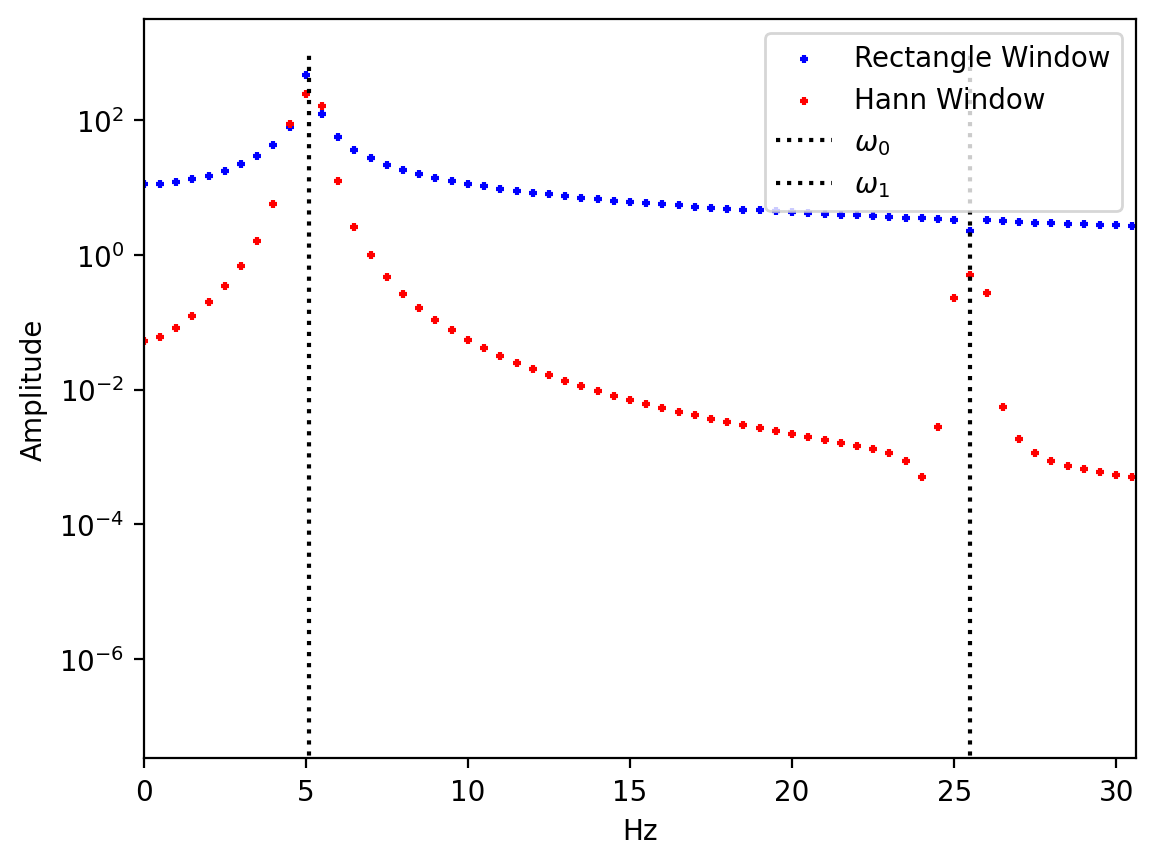

In [15]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(freqRect, np.abs(spectrumRectangle), label='Rectangle Window', c='b', s=10, marker='+')
plt.scatter(freqHann, np.abs(spectrumHann), label='Hann Window', c='r', s=10, marker='+')
plt.vlines(w0, 0, 1000, linestyles='dotted', label=f'$\omega_{0}$', colors='k')
plt.vlines(w1, 0, 1000, linestyles='dotted', label=f'$\omega_{1}$', colors='k')
plt.xlim([0, max(w0, w1) * 1.2])
plt.xlabel("Hz")
plt.ylabel("Amplitude")
plt.yscale('log')
plt.legend()
plt.show()